In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eligibility-prediction-for-loan/Loan_Data.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [5]:
loan_data = pd.read_csv('/kaggle/input/eligibility-prediction-for-loan/Loan_Data.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
loan_data = loan_data.dropna()

In [13]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
loan_data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [19]:
# Value encoding

loan_data = loan_data.replace(to_replace = '3+', value = 4)
loan_data['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [20]:
loan_data['Gender'].value_counts()

Gender
Male      394
Female     86
Name: count, dtype: int64

In [21]:
loan_data = loan_data.replace({'Gender': {'Male': 1, 'Female':0}, 'Married' : {'Yes': 1, 'No': 0}, 'Education' : {'Graduate': 1, 'Not Graduate': 0}, 'Self_Employed' : {'Yes': 1, 'No': 0}, 'Loan_Status' : {'Y': 1, 'N': 0},})
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1


In [22]:
loan_data['Property_Area'].value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [28]:
loan_data = loan_data.replace({'Property_Area': {'Urban': 0, 'Rural': 1, 'Semiurban': 2}})
loan_data.head()
loan_data = loan_data.drop(columns = 'Loan_ID', axis = 1)

<Axes: >

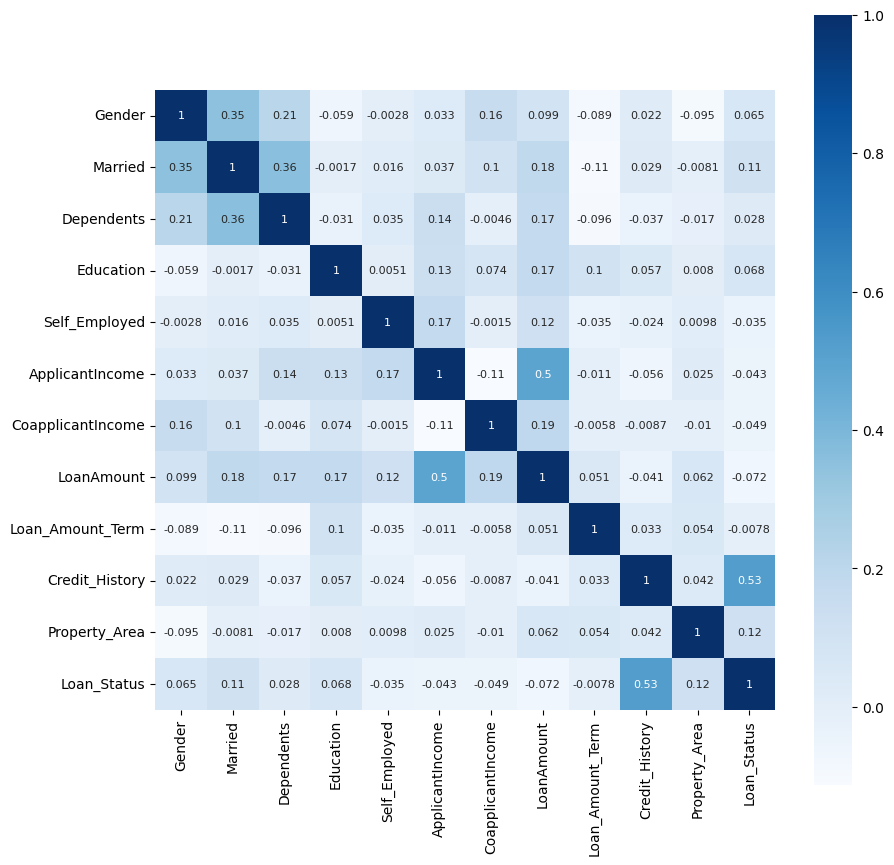

In [29]:
# Correlation between the features
import matplotlib.pyplot as plt

correlation = loan_data.corr()

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cmap = 'Blues', square = True, annot= True, annot_kws = {'size': 8}, cbar = True)


In [31]:
# Seperation

X = loan_data.drop('Loan_Status', axis = 1)
Y = loan_data['Loan_Status']
print(X.shape, Y.shape)

(480, 11) (480,)


In [33]:
# Split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 1)
print(X_train.shape, X_test.shape)

(384, 11) (96, 11)


In [34]:
# Model 

model = svm.SVC(kernel= 'linear')

In [35]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [36]:
# Evaluation 
predicted_Y = model.predict(X_test)
accuracy = accuracy_score(Y_test, predicted_Y)
print(accuracy)

0.8229166666666666
